In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X = pd.get_dummies(X)

In [24]:
X.shape

(201, 37)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [29]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30] , 'max_features': [10,12,15,20,24]}]

In [30]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 12, 15, 20, 24],
                          'n_estimators': [10, 20, 30]}])

In [31]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8305468441469834 {'max_features': 10, 'n_estimators': 10}
0.8466413849022729 {'max_features': 10, 'n_estimators': 20}
0.844281118545732 {'max_features': 10, 'n_estimators': 30}
0.8022315988129742 {'max_features': 12, 'n_estimators': 10}
0.8226941250803377 {'max_features': 12, 'n_estimators': 20}
0.8207005628250622 {'max_features': 12, 'n_estimators': 30}
0.8330844792074267 {'max_features': 15, 'n_estimators': 10}
0.8518265583739089 {'max_features': 15, 'n_estimators': 20}
0.8358168550559171 {'max_features': 15, 'n_estimators': 30}
0.8154240306876069 {'max_features': 20, 'n_estimators': 10}
0.8463707688442238 {'max_features': 20, 'n_estimators': 20}
0.8439338226867397 {'max_features': 20, 'n_estimators': 30}
0.8219855803724819 {'max_features': 24, 'n_estimators': 10}
0.8547352703534905 {'max_features': 24, 'n_estimators': 20}
0.8367714175363664 {'max_features': 24, 'n_estimators': 30}


In [32]:
grid_search.best_params_

{'max_features': 24, 'n_estimators': 20}

In [33]:
grid_search.best_score_

0.8547352703534905

In [34]:
grid_search.best_estimator_

RandomForestRegressor(max_features=24, n_estimators=20)

### Build model with best estimator

In [35]:
model = grid_search.best_estimator_

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [38]:
r2_score(y_test,y_pred)

0.9509983028200071

In [39]:
np.sqrt(mse)

2078.621983242953

<AxesSubplot:ylabel='price'>

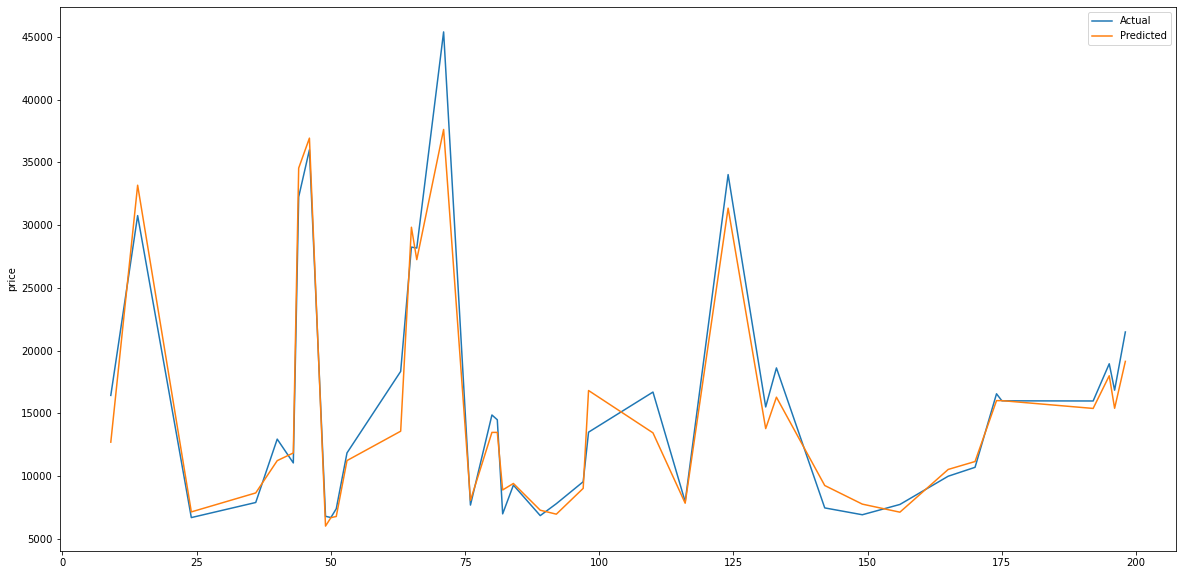

In [40]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")